<a href="https://colab.research.google.com/github/adrsh98/learning/blob/main/assignment_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#1. loading the dataset in python environment

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [88]:
data = pd.read_csv('/content/titanic_dataset.csv')
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1. 'passengerId' as the index column

In [89]:
data = pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')

In [90]:
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


3. checking the basic details of the dataset

In [91]:
data.shape

(891, 11)

In [92]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [94]:
data.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [95]:
#using median and mode for filling null value, 687 null values in cabin i.e drop cabin
data.drop('Cabin',axis=1,inplace=True)






In [96]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [97]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

<ipython-input-97-63b0e3ca4f44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [98]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

<ipython-input-98-7cda4401dcd3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [99]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [100]:
data.nunique()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


In [101]:
data.drop('Name',axis=1,inplace=True)


In [102]:
data.drop('Ticket',axis=1,inplace=True)

In [103]:
#handling outliers atleast 3 columms
#encoding
categorical_columns = [ 'Sex','Embarked']
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
encoded_data = one_hot_enc.fit_transform(data[categorical_columns]).toarray()

encoded_data



array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [104]:
encoded_categorical_data = pd.DataFrame(encoded_data, columns=one_hot_enc.get_feature_names_out(categorical_columns))

encoded_categorical_data.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [105]:
data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_categorical_data], axis=1)

data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,1.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0


In [106]:
#checking outliers of the TARGET VARIABLES- PCCLASS, AGE, FARE
data_encoded.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

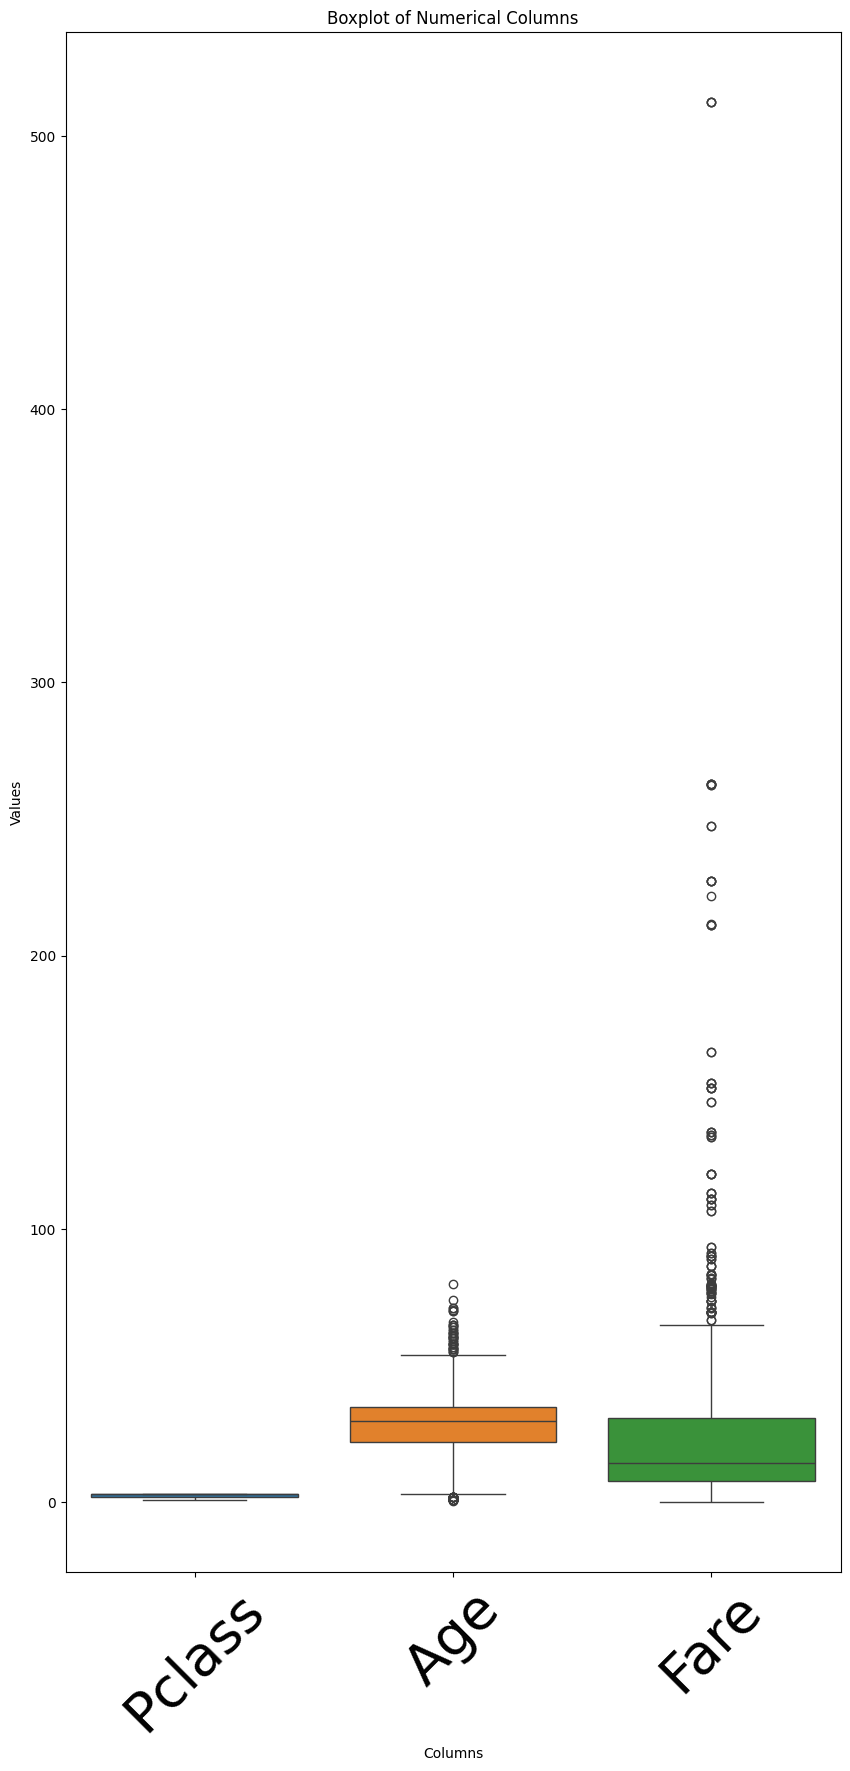

In [107]:
numerical_columns = ['Pclass', 'Age', 'Fare']
plt.figure(figsize=(10,20))
sns.boxplot(data=data_encoded[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45,fontsize=40)
plt.show()

In [108]:
#there is outliers for age and fare, there for apllying outlier capping

outlier_checking = ['Pclass', 'Age', 'Fare']
Q1 = data_encoded[outlier_checking].quantile(0.25)
Q3 = data_encoded[outlier_checking].quantile(0.75)
IQR = Q3 - Q1

outliers_lower = data_encoded[outlier_checking] < (Q1 - 1.5 * IQR)
outliers_upper = data_encoded[outlier_checking] > (Q3 + 1.5 * IQR)

outliers_mild = outliers_upper | outliers_lower
print(data_encoded[outliers_mild])


     Survived  Pclass  Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
1         NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
2         NaN     NaN  NaN    NaN    NaN  71.2833         NaN       NaN   
3         NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
4         NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
5         NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
..        ...     ...  ...    ...    ...      ...         ...       ...   
888       NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
889       NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
890       NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
891       NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   
0         NaN     NaN  NaN    NaN    NaN      NaN         NaN       NaN   

     Embarked_C  Embarked_Q  Embarked_S  
1           NaN         NaN         NaN  
2           NaN

In [109]:
#capping outliers
data_encoded[outlier_checking] = data_encoded[outlier_checking].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR,axis=1)

Text(0, 0.5, 'Values')

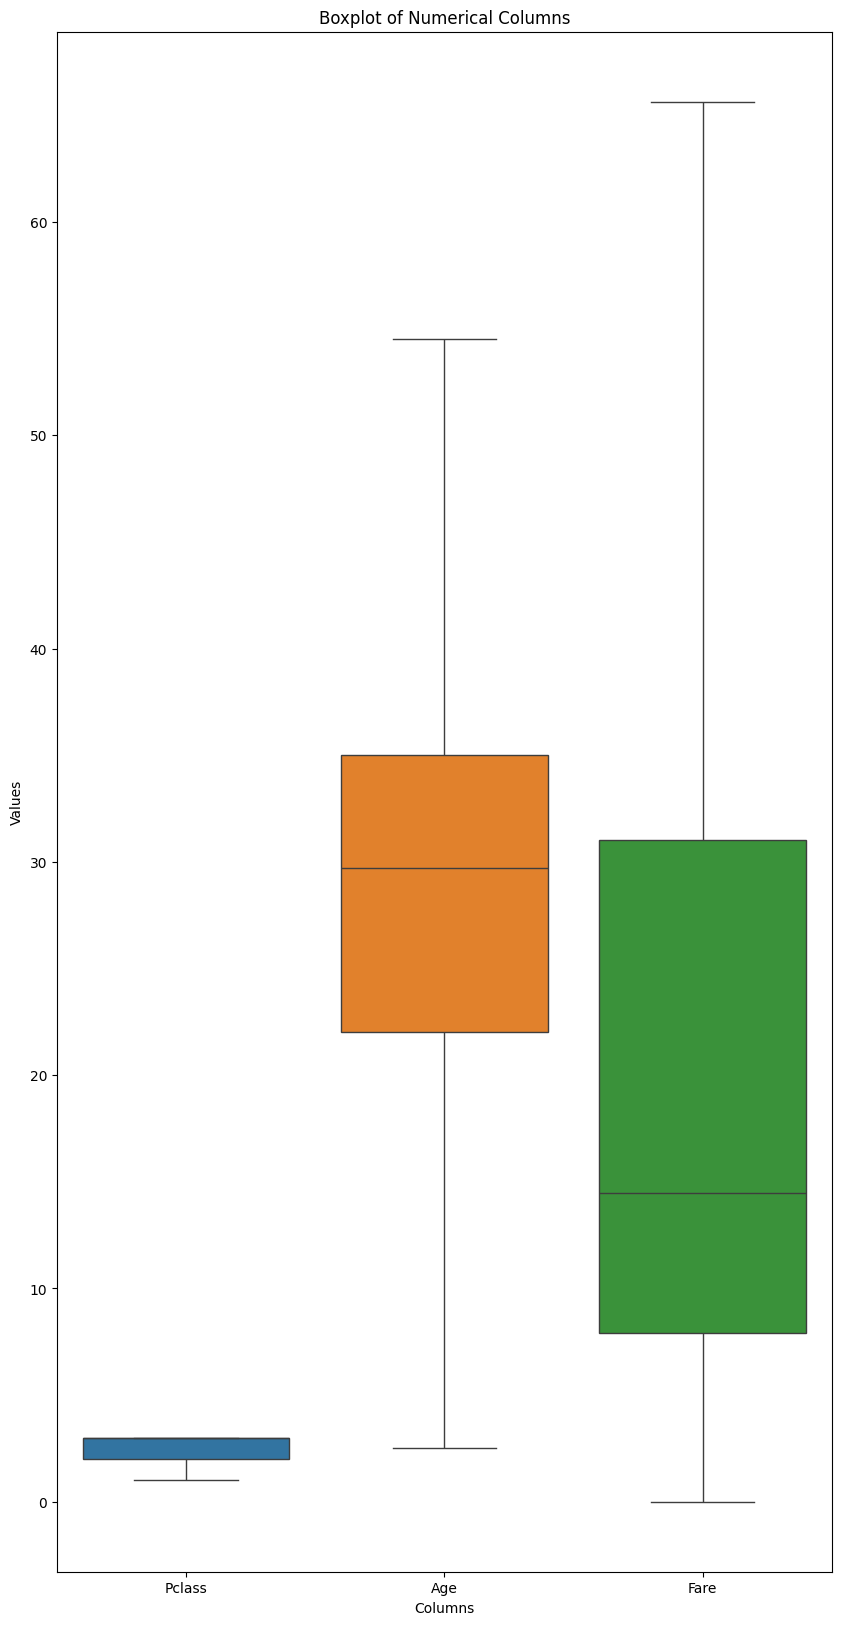

In [110]:
#rechecking

plt.figure(figsize=(10,20))
sns.boxplot(data=data_encoded[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

In [111]:
#hence there is no outliers

In [112]:
#MIN MAX SCALING
data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,38.0,1.0,0.0,65.6344,1.0,0.0,0.0,0.0,1.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0


In [113]:
X1 = data_encoded.drop('Survived',axis=1)
X1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0
2,1.0,38.0,1.0,0.0,65.6344,1.0,0.0,0.0,0.0,1.0
3,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0
5,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0


In [114]:
#applying min max scaling to x1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X1 = mms.fit_transform(X1)
X1

array([[1.        , 0.375     , 0.125     , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.68269231, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.45192308, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.45192308, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.56730769, 0.        , ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        1.        ]])

In [115]:
data_encoded.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [116]:
#converting X1 back to dataframe
X1 = pd.DataFrame(X1,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [117]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.375000,0.125,0.0,0.110460,1.0,0.0,1.0,0.0,0.0
1,0.0,0.682692,0.125,0.0,1.000000,1.0,0.0,0.0,0.0,1.0
2,1.0,0.451923,0.000,0.0,0.120745,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.125,0.0,0.809027,0.0,1.0,0.0,0.0,1.0
4,1.0,0.625000,0.000,0.0,0.122649,0.0,1.0,0.0,1.0,0.0


In [118]:
data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,38.0,1.0,0.0,65.6344,1.0,0.0,0.0,0.0,1.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0


In [119]:
#removing not scaled column from data encoded
data_encoded.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],axis=1,inplace=True)

In [120]:
data_encoded.head()

,Survived
1,0.0
2,1.0
3,1.0
4,1.0
5,0.0


In [121]:
#applying concat
data1 = pd.concat([data_encoded,X1],axis=1)
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0.0,0.0,0.682692,0.125,0.0,1.000000,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.451923,0.000,0.0,0.120745,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.625000,0.125,0.0,0.809027,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.625000,0.000,0.0,0.122649,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.523060,0.000,0.0,0.128870,0.0,1.0,0.0,0.0,1.0
